# Cats Vs Dogs Image Classification

The dataset is available on Kaggle at this [link](https://www.kaggle.com/datasets/salader/dogs-vs-cats). It is organized into two main directories: `train` and `test`.

- The `train` directory contains two subdirectories: `cats` and `dogs`, with 10,000 images each. For this project, the dataset was reduced to 5,000 images per class in the training set.

- The `test` directory also includes `cats` and `dogs` subdirectories, with 2,500 images each. This was reduced to 100 images per class for evaluation purposes.

## Imports

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Load Dataset

In [7]:
base_dir = "./dogs-vs-cats"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

img_size = 150
batch_size = 32

## Data Preparation

In [8]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


## CNN Model Creation

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,813,889 (25.99 MB)

 Trainable params: 6,812,929 (25.99 MB)

 Non-trainable params: 960 (3.75 KB)

## Model Training

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 138s 256ms/step - accuracy: 0.5920 - loss: 1.8405 - val_accuracy: 0.6587 - val_loss: 1.5446
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 126s 251ms/step - accuracy: 0.6767 - loss: 1.4626 - val_accuracy: 0.7132 - val_loss: 1.3467
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 125s 251ms/step - accuracy: 0.7031 - loss: 1.3276 - val_accuracy: 0.7390 - val_loss: 1.2107
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 126s 252ms/step - accuracy: 0.7239 - loss: 1.2056 - val_accuracy: 0.7445 - val_loss: 1.1104
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 125s 249ms/step - accuracy: 0.7537 - loss: 1.0824 - val_accuracy: 0.7617 - val_loss: 1.0033
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 125s 250ms/step - accuracy: 0.7638 - loss: 0.9852 - val_accuracy: 0.7753 - val_loss: 0.9049
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 143s 286ms/step - accuracy: 0.7649 - loss: 0.9005 - val_accuracy: 0.7613 - val_loss: 0.8493
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 125s 249ms/step - accuracy: 0.7875 -

## Model Evaluation

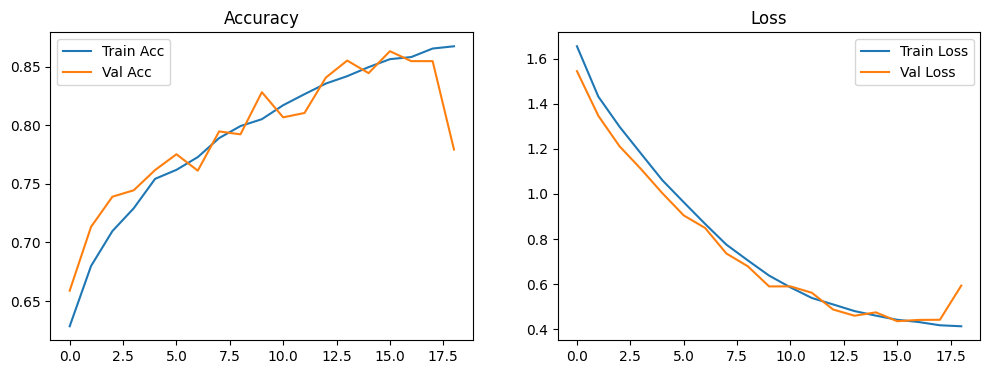

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")
plt.show()

In [12]:
val_generator.reset()
preds = model.predict(val_generator, verbose=1)
pred_labels = (preds > 0.5).astype(int).flatten()
true_labels = val_generator.classes

print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels, target_names=["Cat", "Dog"]))

125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 189ms/step
[[ 993 1007]
 [1010  990]]
              precision    recall  f1-score   support

         Cat       0.50      0.50      0.50      2000
         Dog       0.50      0.49      0.50      2000

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000



## Prediction on Test data

In [ ]:
def predict_img(filepath):
    img = image.load_img(filepath, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)[0][0]
    return f"Dog ({pred:.2f})" if pred > 0.5 else f"Cat ({1 - pred:.2f})"

In [14]:
print(predict_img('./dogs-vs-cats/test/cats/cat.26.jpg'))
print(predict_img('./dogs-vs-cats/test/cats/cat.66.jpg'))
print(predict_img('./dogs-vs-cats/test/cats/cat.76.jpg'))
print(predict_img('./dogs-vs-cats/test/cats/cat.78.jpg'))
print(predict_img('./dogs-vs-cats/test/cats/cat.83.jpg'))
print(predict_img('./dogs-vs-cats/test/dogs/dog.96.jpg'))
print(predict_img('./dogs-vs-cats/test/dogs/dog.98.jpg'))
print(predict_img('./dogs-vs-cats/test/dogs/dog.964.jpg'))
print(predict_img('./dogs-vs-cats/test/dogs/dog.965.jpg'))
print(predict_img('./dogs-vs-cats/test/dogs/dog.9523.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step
Dog (0.54)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Cat (0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Cat (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Cat (0.94)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Cat (0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Dog (0.75)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dog (0.77)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Dog (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dog (0.98)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Dog (0.97)
